In [24]:
from bs4 import BeautifulSoup as bs 
import pandas as pd, matplotlib.pyplot as plt, numpy as np, requests, datetime

In [25]:
webpage = requests.get("https://economictimes.indiatimes.com/marketstats/pid-0,marketcap-largecap%252Cmidcap,pageno-1,sortby-percentchange,sortorder-desc,sort-intraday,exchange-50,index-2369.cms?from=mdr")
soup = bs(webpage.content, "html.parser")

company_name = [item.get_text() for item in soup.find_all("p", class_="flt w150")]
ltp = [item.get_text() for item in soup.find_all("span", class_="ltp")]
volume = [item.get_text() for item in soup.find_all("span", class_="vol")]
d_low = [item.get_text() for item in soup.find_all("span", class_="flt")]
d_high = [item.get_text() for item in soup.find_all("span", class_="flr")]

del d_low[0:3]
del d_high[0:3]

df = pd.DataFrame({"Company Name": company_name, 
                   "Last Traded Price": ltp, 
                   "Stock Volume": volume,
                  })

df["Stock Volume"] = pd.to_numeric(df["Stock Volume"])
df["Last Traded Price"] = pd.to_numeric(df["Last Traded Price"])

df1 = pd.DataFrame({
        "Company Name": company_name,
        "Day's Low Valuation": d_low,
        "Day's High Valuation": d_high
        })
df1["Day's Low Valuation"] = pd.to_numeric(df1["Day's Low Valuation"])
df1["Day's High Valuation"] = pd.to_numeric(df1["Day's High Valuation"])

cell_hover = {
    'selector': 'td:hover',
    'props': 'background-color: #ffffb3'
}
headers = {
    'selector': 'th',
    'props': 'background-color: #000066; color: white; text-align : center'
}
caption = {
    'selector': "caption",
    'props': [("font-color", "#000066"), ("font-size", "120%"), ("text-align", "Right")]
}

styled_df = df.style.set_caption(f"Top Gainers As on {datetime.datetime.now().strftime('%Y-%B-%d, %X')}")\
                     .background_gradient() \
                     .set_properties(**{'text-align': 'center',
                                       'background-color': '#FFFFFF',
                                       'color': '#000000'
                                       }) \
                     .set_table_styles([headers,cell_hover, caption])


In [26]:
styled_df

,Company Name,Last Traded Price,Stock Volume
0,Sabar Flex India,22.900000,240.000000
1,Brooks Labs,112.450000,316.570000
2,Holmarc Opto-Mechatr,88.000000,0.000000
3,Vilin Bio Med Ltd.,22.450000,12.000000
4,Committed Cargo Care,63.950000,0.000000
5,R K Swamy,283.400000,2902.440000
6,Dollex Agrotech,43.500000,12.000000
7,Ibull Real Estate,116.950000,26809.520000
8,Nandani Creation,49.650000,558.040000
9,Pritika Engineering,58.300000,42.000000


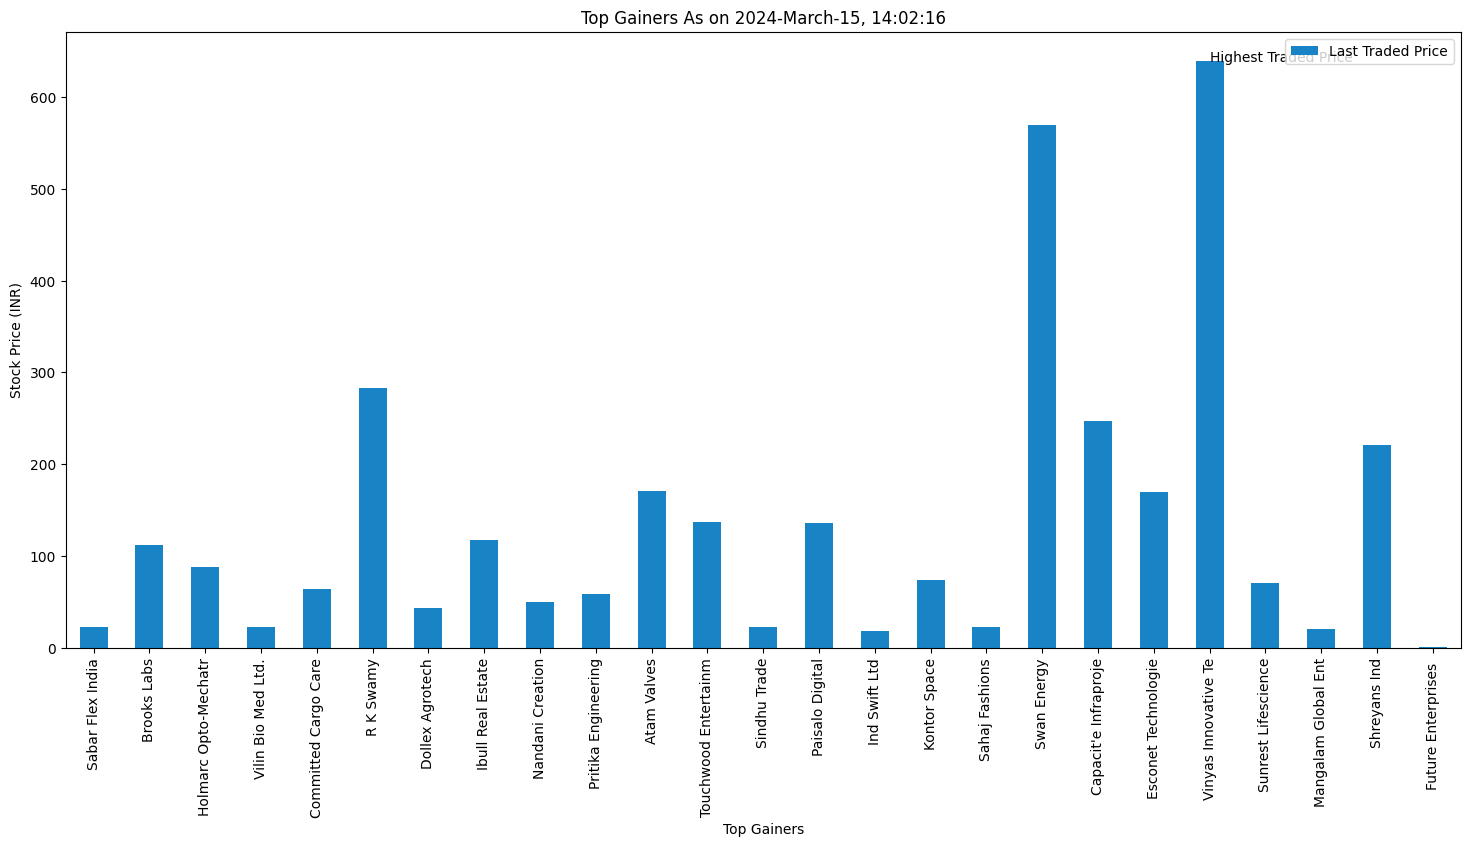

In [27]:
df.plot(
    x="Company Name",
    y="Last Traded Price",
    kind="bar",
    style="--",
    color= "#1984c5",
    figsize= (18, 8),
    title= f"Top Gainers As on {datetime.datetime.now().strftime('%Y-%B-%d, %X')}",
    xlabel= "Top Gainers",
    ylabel= "Stock Price (INR)",
    rot= 90
)
plt.xticks(np.arange(len(df["Company Name"])), df["Company Name"])

for i, price in enumerate(df["Last Traded Price"]):
    if price >= 600:
        plt.text(i, price, "Highest Traded Price")
        
plt.show()

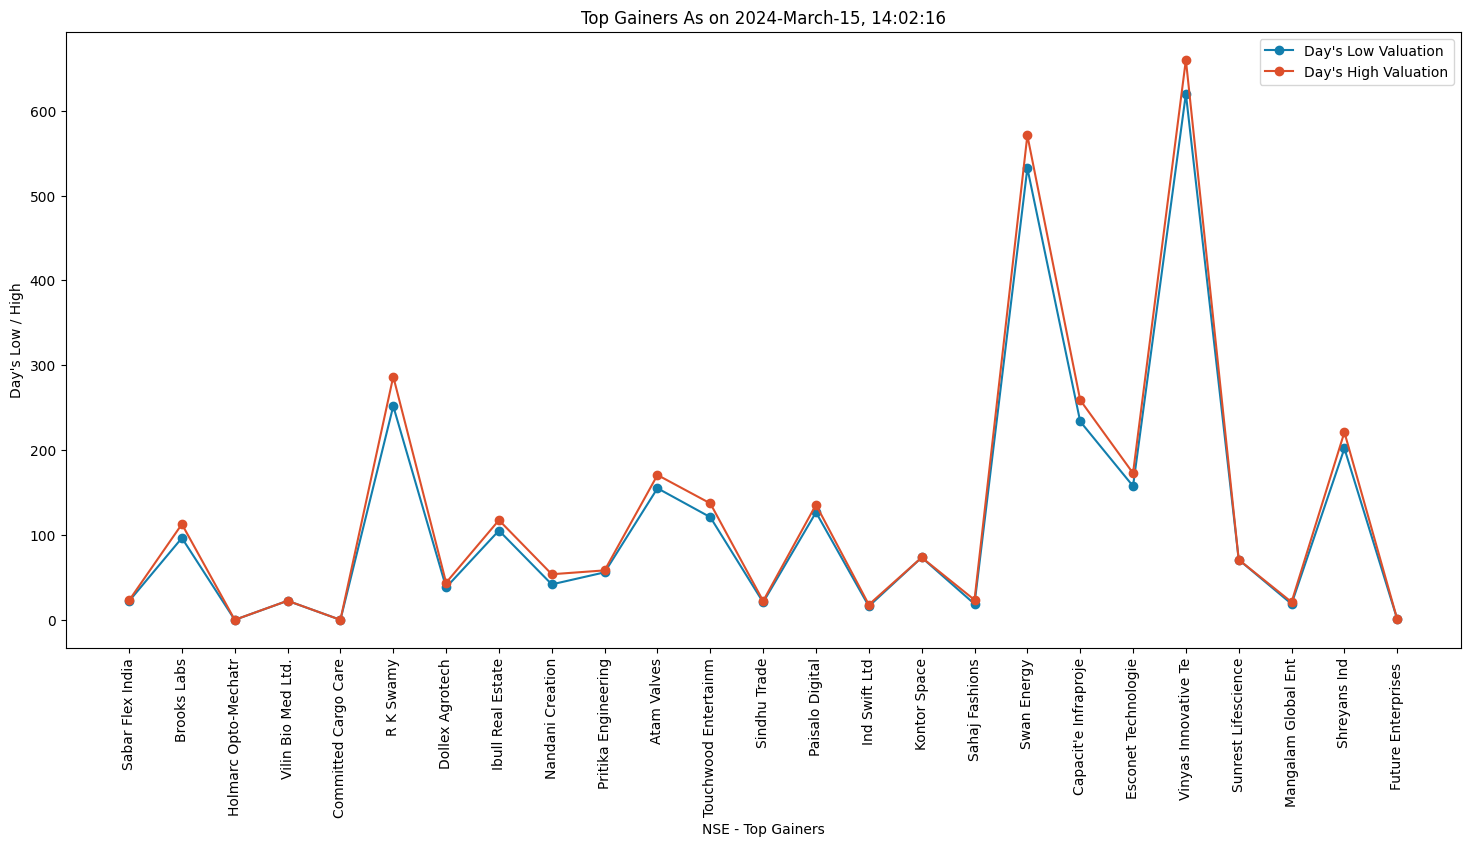

In [28]:
df1.plot(style = "o-",
         x = "Company Name",
         rot = 90,
         y = ["Day's Low Valuation","Day's High Valuation"],
         stacked=False, 
         figsize=(18, 8), 
         color={"Day's Low Valuation": "#127ead", "Day's High Valuation": "#dd4f2b"}
        )
plt.xlabel("NSE - Top Gainers")
plt.xticks(np.arange(len(df["Company Name"])), df["Company Name"])
plt.ylabel("Day's Low / High")
plt.title(f"Top Gainers As on {datetime.datetime.now().strftime('%Y-%B-%d, %X')}")

plt.show()


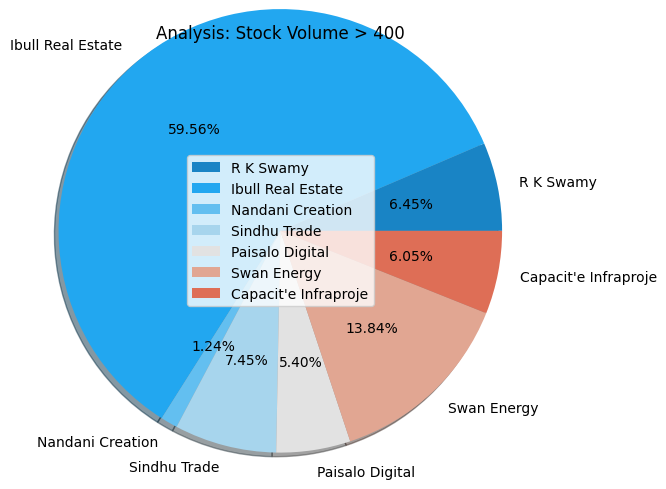

In [29]:
plt.pie(df.loc[df["Stock Volume"] > 400, "Stock Volume"], 
        labels=df.loc[df["Stock Volume"] > 400, "Company Name"],
        autopct='%1.2f%%', 
        colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"],
        textprops={"fontsize": 10, "color": "black"}, 
        radius=1.5, 
        shadow=True)

plt.legend(
          loc="center")
plt.title("Analysis: Stock Volume > 400")
plt.show()


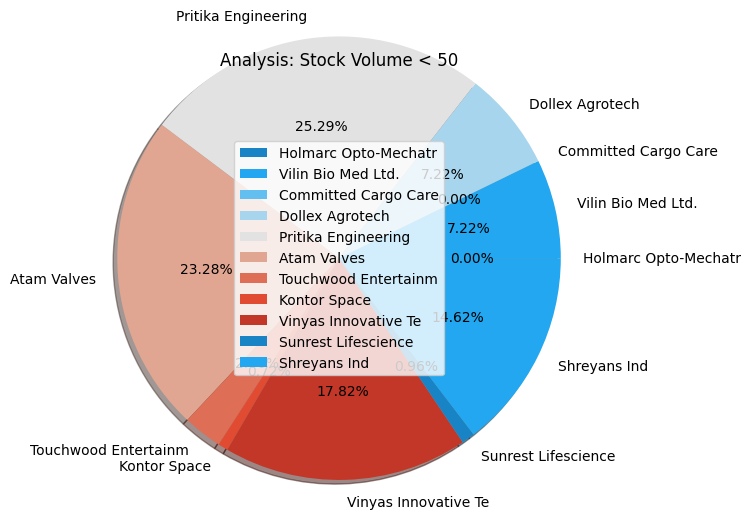

In [30]:
plt.pie(df.loc[df["Stock Volume"] < 50, "Stock Volume"], 
        labels=df.loc[df["Stock Volume"] < 50, "Company Name"],
        autopct='%1.2f%%', 
        colors=["#1984c5", "#22a7f0", "#63bff0", "#a7d5ed", "#e2e2e2", "#e1a692", "#de6e56", "#e14b31", "#c23728"],
        textprops={"fontsize": 10, "color": "black"}, 
        radius=1.5, 
        shadow=True)

plt.legend(
          loc="center")
plt.title("Analysis: Stock Volume < 50")
plt.show()


In [31]:
df

,Company Name,Last Traded Price,Stock Volume
0,Sabar Flex India,22.90,240.00
1,Brooks Labs,112.45,316.57
2,Holmarc Opto-Mechatr,88.00,0.00
3,Vilin Bio Med Ltd.,22.45,12.00
4,Committed Cargo Care,63.95,0.00
5,R K Swamy,283.40,2902.44
6,Dollex Agrotech,43.50,12.00
7,Ibull Real Estate,116.95,26809.52
8,Nandani Creation,49.65,558.04
9,Pritika Engineering,58.30,42.00


In [32]:
df1

,Company Name,Day's Low Valuation,Day's High Valuation
0,Sabar Flex India,22.00,22.90
1,Brooks Labs,96.50,112.80
2,Holmarc Opto-Mechatr,0.00,0.00
3,Vilin Bio Med Ltd.,22.45,22.50
4,Committed Cargo Care,0.00,0.00
5,R K Swamy,251.90,286.70
6,Dollex Agrotech,38.25,43.80
7,Ibull Real Estate,105.25,117.50
8,Nandani Creation,41.80,53.75
9,Pritika Engineering,56.00,58.30
